# Loop Closure GroundTruth Text Handling

In [2]:
LC_corr_list = []
with open('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/GroundTruth Text/CityCentreGroundTruth.txt') as fp:
    row = 1
    for line in fp:
        row_ele = line.strip().split(',')
        if ('1' in row_ele):
            
            col = 1
            for r in row_ele:
                if (r == '1'):
#                     print('(row, col) (%d, %d)' % (row, col))
                    LC_corr_list.append([row,col])
                col+=1
                
        row += 1    
    else:
        print('eof')

eof


In [3]:
GPS_info_list = [[0,0]] # dummy for a start index 1
with open('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/GroundTruth Text/CityCentreGPSData.txt') as fp:
    for line in fp:
        GPS_info_list.append(
            [float(line.strip().split(' ')[1]) , float(line.strip().split(' ')[2])]
        )
    else:
        print('eof')

eof


1353 [201.13763, -174.712228]
305 [196.393236, -168.938331]


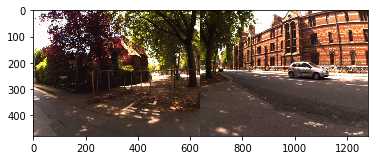

1353 [201.13763, -174.712228]
307 [197.609113, -170.204232]


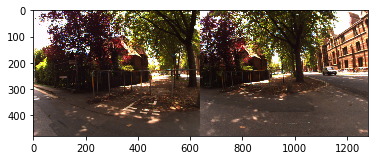

1353 [201.13763, -174.712228]
309 [199.350128, -170.058403]


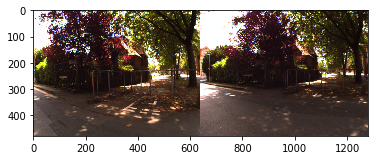

1354 [201.834195, -174.533702]
306 [197.003415, -169.924286]


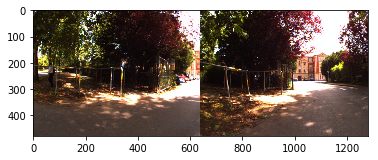

1354 [201.834195, -174.533702]
308 [198.528209, -170.186089]


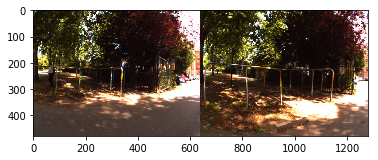

1354 [201.834195, -174.533702]
310 [200.333497, -169.910673]


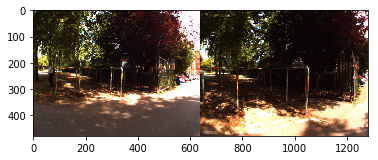

In [31]:
def isOdd(val):
    return not (val%2==0)

def isEven(val):
    return (val%2==0)

for i, corr in enumerate(LC_corr_list):
    if (isOdd(corr[0]) and isEven(corr[1])):
        continue
    if (isEven(corr[0]) and isOdd(corr[1])):
        continue
    
    img_i_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[0])
    img_j_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[1])
    print(corr[0], GPS_info_list[corr[0]])
    print(corr[1], GPS_info_list[corr[1]])
    
    img_i = mpimg.imread(img_i_path)
    img_j = mpimg.imread(img_j_path)
    
    merge_img = np.hstack([img_i, img_j])
    plt.imshow(merge_img)
    plt.show()
    
    if i > 10:
        break

# Result Analysis

In [65]:
# import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters
SURF_result_text  = '/home/dongwonshin/Desktop/LC_text_results/20170623_SURF_result_from_large.txt'
DCGAN_result_text = '/home/dongwonshin/Desktop/LC_text_results/20170623_DCGAN_result_128dim.txt'

threshold = 5
how_many = 1000


def showVisualResult(c, from_, to_):
    
    if (from_ <= c and c <= to_):    
        print('%4d' % int(c), gps_c)
        print('%4d' % int(s), gps_s, gps_cs, LC_cs)
        print('%4d' % int(d), gps_d, gps_cd, LC_cd)
        print()

        cur_path = '/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % int(c)
        surf_path = '/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % int(s)
        dcgan_path = '/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % int(d)

        print(cur_path)
        print(surf_path)
        print(dcgan_path)

        cur_img = mpimg.imread(cur_path)
        surf_img = mpimg.imread(surf_path)
        dcgan_img = mpimg.imread(dcgan_path)

        one_img = np.hstack([cur_img, surf_img, dcgan_img])
        plt.imshow(one_img)
        plt.show()

with open(SURF_result_text) as fp:
        
    SURF_current_idx = []
    SURF_most_related_idx = []
        
    lines = fp.readlines()
    for line in lines:
        ele = line.strip().split(',')
        SURF_current_idx.append(ele[0].split('=')[1])
        SURF_most_related_idx.append(ele[2].split('=')[1])

with open(DCGAN_result_text) as fp:
        
    DCGAN_current_idx = []
    DCGAN_most_related_idx = []
        
    lines = fp.readlines()
    for line in lines:
        ele = line.strip().split(',')
        DCGAN_current_idx.append(ele[0].split('=')[1])
        DCGAN_most_related_idx.append(ele[2].split('=')[1])
        
cnt = 0
LC_cs_cnt = 0
LC_cd_cnt = 0
for c, s, d in zip(SURF_current_idx, SURF_most_related_idx, DCGAN_most_related_idx):
    
    c = int(c); s = int(s); d = int(d)
    
    gps_c = np.array(GPS_info_list[c])
    gps_s = np.array(GPS_info_list[s])
    gps_d = np.array(GPS_info_list[d])
    
    gps_cs = np.linalg.norm(gps_c-gps_s)
    gps_cd = np.linalg.norm(gps_c-gps_d)
    
    if (gps_cs < threshold):
        if (isOdd(c) and isEven(s)):
            continue
        if (isEven(c) and isOdd(s)):
            continue
        LC_cs = 'true'
        LC_cs_cnt += 1
    else:
        LC_cs = 'false'
        
    if (gps_cd < threshold):
        if (isOdd(c) and isEven(d)):
            continue
        if (isEven(c) and isOdd(d)):
            continue
        LC_cd = 'true'
        LC_cd_cnt += 1
    else:
        LC_cd = 'false'
    
#     showVisualResult(int(c), 0,100)
    
    if (cnt > how_many):
        break
    else:
        cnt += 1

print('LC_cs_cnt = %d/%d(%0.2f), LC_cd_cnt = %d/%d(%0.2f)' % (LC_cs_cnt,how_many,LC_cs_cnt/how_many , LC_cd_cnt,how_many, LC_cd_cnt/how_many))

LC_cs_cnt = 632/1000(0.63), LC_cd_cnt = 811/1000(0.81)


In [35]:
# import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters
ORB_result_text  = '/home/dongwonshin/Desktop/LC_text_results/20170624_ORB_result.txt'
SURF_result_text  = '/home/dongwonshin/Desktop/LC_text_results/20170623_SURF_result_from_large.txt'
BRISK_result_text  = '/home/dongwonshin/Desktop/LC_text_results/20170624_BRISK_result.txt'
DCGAN_result_text = '/home/dongwonshin/Desktop/LC_text_results/20170623_DCGAN_result_128dim.txt'

gps_threshold = 5
how_many = 1000


def isOdd(val):
    return not (val%2==0)
def isEven(val):
    return (val%2==0)
def isBothOdd(a,b):
    return isOdd(a) and isOdd(b)
def isBothEven(a,b):
    return isEven(a) and isEven(b)
def isBothSameType(a,b):
    return isBothOdd(a,b) or isBothEven(a,b)


def showVisualResult(corr_idx_list, corr_gps_list, from_, to_):
    
#     plt.figure(figsize=(20,10))
    
    if (from_ <= c and c <= to_):
        path_list = []
        for idx in corr_idx_list:
            path_list.append('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % int(idx))
            
        for i, g in zip (corr_idx_list, corr_gps_list):
            if np.linalg.norm(corr_gps_list[0]-g) < gps_threshold:
                
                decision_str = 'true'
            else:
                decision_str = 'false'
            print('%3d ' % i,g, decision_str)
            
        
        img_list = []
        for path in path_list:
            img_list.append(mpimg.imread(path))

        one_img = np.hstack(img_list)
        plt.imshow(one_img)
        plt.show()

def mostRelatedIdx(result_text):
    
    with open(result_text) as fp:
        current_idx = []
        most_related_idx = []

        lines = fp.readlines()
        for line in lines:
            ele = line.strip().split(',')
            current_idx.append(ele[0].split('=')[1])
            most_related_idx.append(ele[2].split('=')[1])
    
    return most_related_idx

def LC_Decison(gps_diff, LC_cnt):
        
    if (gps_diff < gps_threshold):
        LC_cnt += 1
        
    return LC_cnt

SURF_most_related_idx = mostRelatedIdx(SURF_result_text)
ORB_most_related_idx = mostRelatedIdx(ORB_result_text)
BRISK_most_related_idx = mostRelatedIdx(BRISK_result_text)
DCGAN_most_related_idx = mostRelatedIdx(DCGAN_result_text)

LC_cs_cnt = 0
LC_co_cnt = 0
LC_cd_cnt = 0
LC_cb_cnt = 0
c = 1
for s, o, b, d in zip(SURF_most_related_idx, ORB_most_related_idx, BRISK_most_related_idx, DCGAN_most_related_idx):
    s = int(s); o = int(o); b = int(b); d = int(d)
    
    corr_idx_list = [c,s,o,b,d]
    corr_gps_list = np.array([GPS_info_list[idx] for idx in corr_idx_list])
    
    LC_cnt_list = [0,0,0,0,0]
    if (isBothSameType(corr_idx_list[0], corr_idx_list[1])):
        LC_cs_cnt = LC_Decison(np.linalg.norm(corr_gps_list[0]-corr_gps_list[1]), LC_cs_cnt)
    if (isBothSameType(corr_idx_list[0], corr_idx_list[2])):
        LC_co_cnt = LC_Decison(np.linalg.norm(corr_gps_list[0]-corr_gps_list[2]), LC_co_cnt)
    if (isBothSameType(corr_idx_list[0], corr_idx_list[3])):
        LC_cb_cnt = LC_Decison(np.linalg.norm(corr_gps_list[0]-corr_gps_list[3]), LC_cb_cnt)
    if (isBothSameType(corr_idx_list[0], corr_idx_list[4])):
        LC_cd_cnt = LC_Decison(np.linalg.norm(corr_gps_list[0]-corr_gps_list[4]), LC_cd_cnt)
    
#     showVisualResult(corr_idx_list, corr_gps_list, 0,100)
    
    if (c > how_many):
        break
    else:
        c += 1
    
print(' SURF Result = %d/%d (%0.2f)' % (LC_cs_cnt,how_many,LC_cs_cnt/how_many))
print('  ORB Result = %d/%d (%0.2f)' % (LC_co_cnt,how_many, LC_co_cnt/how_many))
print('BRISK Result = %d/%d (%0.2f)' % (LC_cb_cnt,how_many, LC_cb_cnt/how_many))
print('DCGAN Result = %d/%d (%0.2f)' % (LC_cd_cnt,how_many, LC_cd_cnt/how_many))

 SURF Result = 632/1000 (0.63)
  ORB Result = 515/1000 (0.52)
BRISK Result = 451/1000 (0.45)
DCGAN Result = 813/1000 (0.81)
